# Cancer Mortality Rate Prediction

# Frame the problem

## Objective: 

The objective of this project is to predict cancer mortality rates using data from several counties in the United States. 
In this presentation I will show you how I designed my solution to predicting cancer mortality rates using a machine learning algorithm. 

## Type of Task: 

This task would fall into supervised learning because the model would be trained with labeled examples and each instance comes with an expected output. 

## How will model performance be measured?

My solution for predicting cancer mortality rates will be using the root mean squared error performance measure. I have selected this performance measure because it the performance measure I am most familiar with using, and for many it is the performance measure of choice for regression-based machine learning algorithms.

# Obtaining and Downloading Data

The dataset being used for this solution will be the OLS Regression challenge dataset collected and formed by the user Noah Rippner from https://data.world/. The exact dataset can be found from the following hyperlink. https://data.world/nrippner/ols-regression-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://query.data.world/s/muw4qlj3euwikk2x5ekfdey6cfokwj"
df = pd.read_csv(url, encoding='latin-1')

## Examine Data

Here we can see that there is numerical data, categorical, null data, and a lot of atttributes. 

In [3]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [4]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


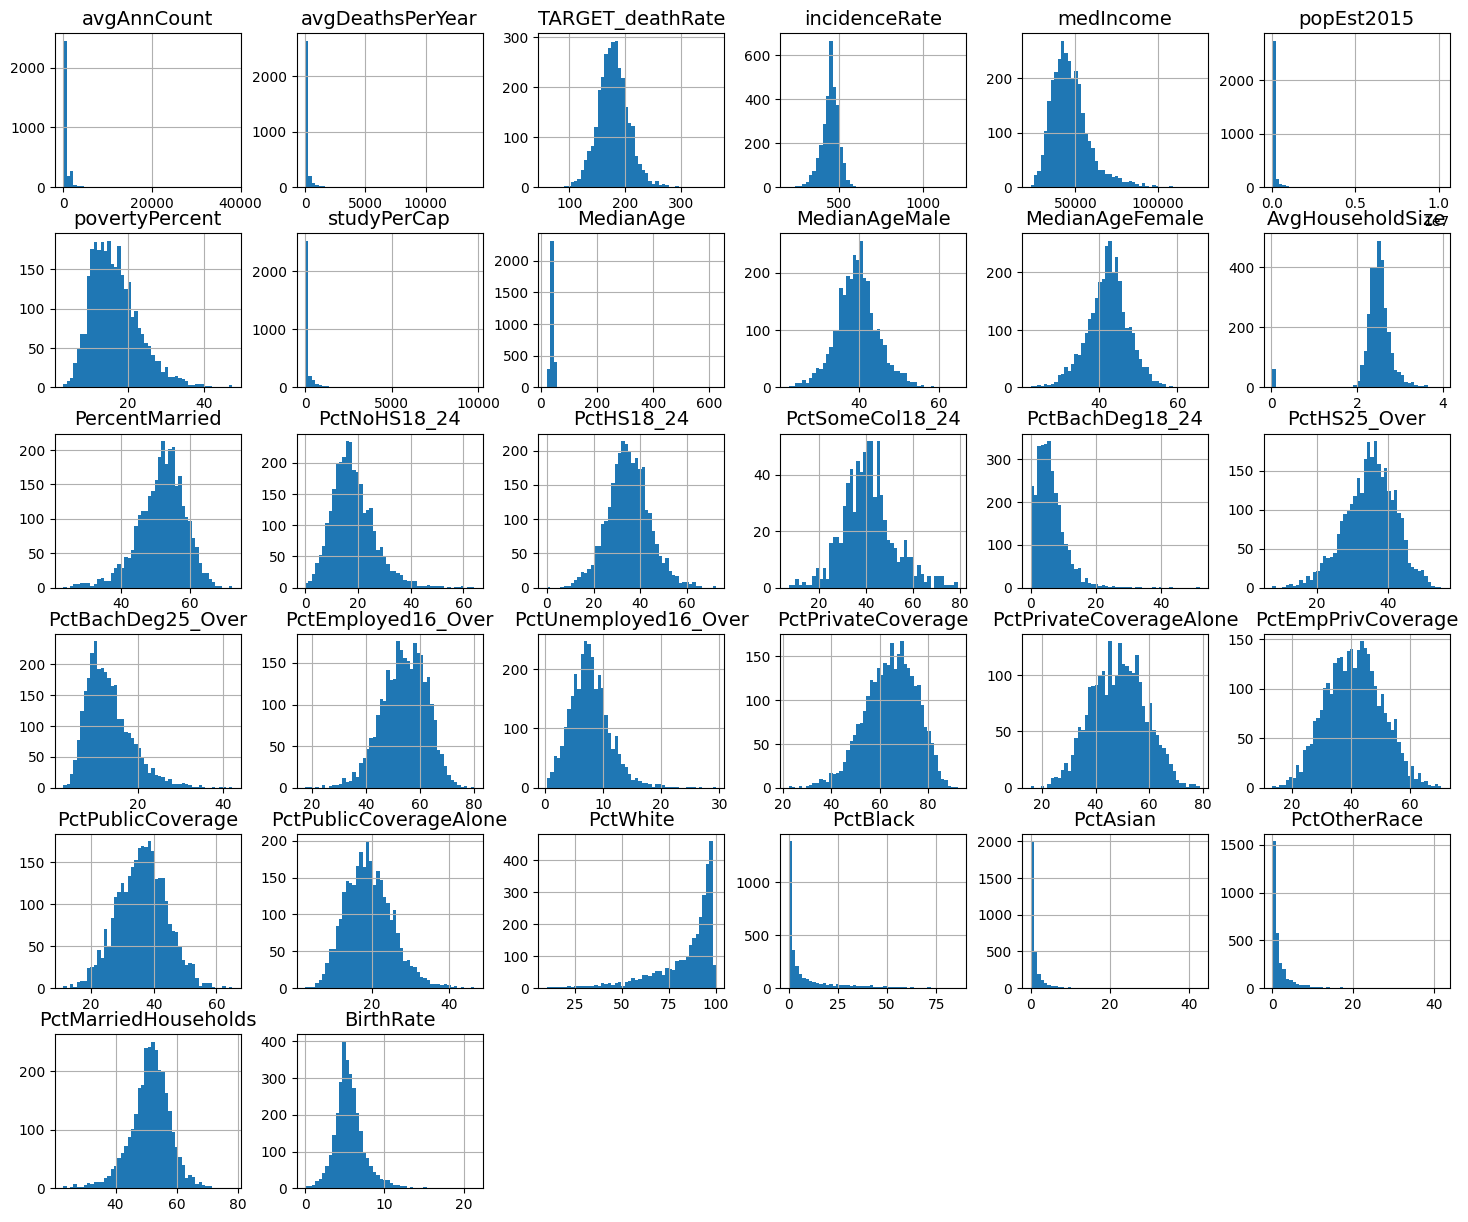

In [5]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(18, 15))
plt.show()

# Data Preparation

The first thing I want to do is to make a copy of the dataset.

In [31]:
cancer = df

Next, I create a correlation matrix to see the correlations of data attributes.

In [23]:
corr_matrix = cancer.corr(method='pearson')

Using the correlation matrix to see all the correlations to TARGET_deathRate

In [24]:
corr_matrix["TARGET_deathRate"].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctUnemployed16_Over       0.378412
PctHS18_24                 0.261976
PctBlack                   0.257024
PctNoHS18_24               0.088463
MedianAgeFemale            0.012048
MedianAge                  0.004375
MedianAgeMale             -0.021929
studyPerCap               -0.022285
AvgHouseholdSize          -0.036905
BirthRate                 -0.087407
avgDeathsPerYear          -0.090715
popEst2015                -0.120073
avgAnnCount               -0.143532
PctWhite                  -0.177400
PctAsian                  -0.186331
PctSomeCol18_24           -0.188688
PctOtherRace              -0.189894
PercentMarried            -0.266820
PctEmpPrivCoverage        -0.267399
PctBachDeg18_24           -0.287817
PctMarriedHouseholds      -0.293325
PctPrivateCoverageAlone   -0

These are attributes that have poor correlation to the target attribute so I decided to drop them. 

In [26]:

cancer = cancer.drop("studyPerCap", axis=1)
cancer = cancer.drop("AvgHouseholdSize", axis=1)
cancer = cancer.drop("medIncome", axis=1)
cancer = cancer.drop("popEst2015", axis=1)
cancer = cancer.drop("PercentMarried", axis=1)
cancer = cancer.drop("PctMarriedHouseholds", axis=1)
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   povertyPercent           3047 non-null   float64
 5   MedianAge                3047 non-null   float64
 6   MedianAgeMale            3047 non-null   float64
 7   MedianAgeFemale          3047 non-null   float64
 8   PctNoHS18_24             3047 non-null   float64
 9   PctHS18_24               3047 non-null   float64
 10  PctSomeCol18_24          762 non-null    float64
 11  PctBachDeg18_24          3047 non-null   float64
 12  PctHS25_Over             3047 non-null   float64
 13  PctBachDeg25_Over        3047 non-null   float64
 14  PctEmployed16_Over      

The next thing I want to do is to split the data up into training and test sets.

In [32]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cancer, test_size=0.2, random_state=42)

Examining the values in TARGET_deathRate to better understand what the model is predicting. 

In [33]:
cancer["TARGET_deathRate"].head()

0    164.9
1    161.3
2    174.7
3    194.8
4    144.4
Name: TARGET_deathRate, dtype: float64

Here I am clustering some of the values of the target attribute to put them in groups. 

In [34]:
cancer["death_cat"] = pd.cut(df["TARGET_deathRate"],
                               bins=[0, 100, 125, 150, 175, 200, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

Here is a graph visualizing the clusters and what kind of values are more frequent in the attribute. 

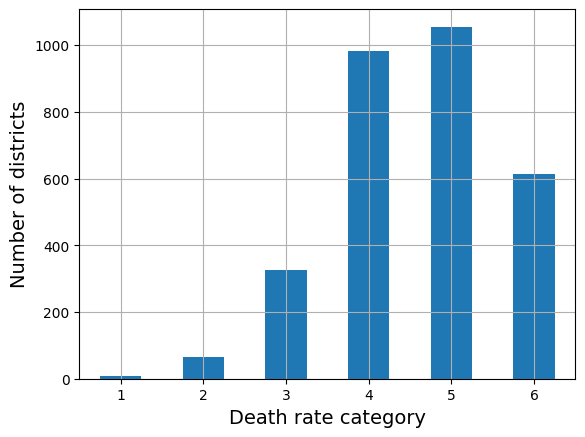

In [35]:
cancer["death_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Death rate category")
plt.ylabel("Number of districts")
plt.show()

Next, I decide to use the Stratified Shuffle Split package to shuffle and balance my training and testing data.

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cancer, cancer["death_cat"]):
    strat_train_set_n = cancer.iloc[train_index]
    strat_test_set_n = cancer.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [37]:
strat_train_set, strat_test_set = strat_splits[0]

In [38]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    cancer, test_size=0.2, stratify=cancer["death_cat"], random_state=42)

Here I am dropping the death_cat column that I used for grouping the TARGET_deathRate values together because I won't be using it anymore.

In [39]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("death_cat", axis=1, inplace=True)

Here I am dropping the TARGET_deathRate from the training set so my model can predict the values for it later. 

In [40]:
cancer = strat_train_set.drop("TARGET_deathRate", axis=1)
cancer_labels = strat_train_set["TARGET_deathRate"].copy()

## Cleaning floating numbers and integers with an imputer

To start cleaning and preparing my data for the machine learning model, I will use an imputer to calculate the mean values for numerical data to replace any null data.

In [41]:
from sklearn.impute import SimpleImputer

meanImputer = SimpleImputer(strategy="mean")


Here I am creating a dataframe that only includes numerical features that will work with the imputer.

In [42]:
cancer_num = cancer.select_dtypes(include=[np.number])

In [22]:
cancer_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 693 to 2178
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2437 non-null   float64
 1   avgDeathsPerYear         2437 non-null   int64  
 2   incidenceRate            2437 non-null   float64
 3   povertyPercent           2437 non-null   float64
 4   MedianAge                2437 non-null   float64
 5   MedianAgeMale            2437 non-null   float64
 6   MedianAgeFemale          2437 non-null   float64
 7   PctNoHS18_24             2437 non-null   float64
 8   PctHS18_24               2437 non-null   float64
 9   PctSomeCol18_24          624 non-null    float64
 10  PctBachDeg18_24          2437 non-null   float64
 11  PctHS25_Over             2437 non-null   float64
 12  PctBachDeg25_Over        2437 non-null   float64
 13  PctEmployed16_Over       2307 non-null   float64
 14  PctUnemployed16_Over  

Here I am fitting the imputer to the numerical dataframe.

In [43]:
meanImputer.fit(cancer_num)

SimpleImputer()

This is the outcome of the imputer, and we can check this by calculating the mean values of the dataframe. 

In [44]:
meanImputer.statistics_

array([6.17702434e+02, 1.90249487e+02, 4.48368714e+02, 4.70491752e+04,
       1.05433583e+05, 1.68771851e+01, 1.55766658e+02, 4.52559705e+01,
       3.96274518e+01, 4.21919163e+01, 2.47464908e+00, 5.18127206e+01,
       1.82058268e+01, 3.49939270e+01, 4.12060897e+01, 6.12031186e+00,
       3.48464916e+01, 1.32328683e+01, 5.40900303e+01, 7.84874846e+00,
       6.43361510e+01, 4.83220786e+01, 4.11384079e+01, 3.63566680e+01,
       1.92966352e+01, 8.35186437e+01, 9.06974101e+00, 1.25093456e+00,
       1.99280374e+00, 5.12629914e+01, 5.62198164e+00])

Checking the values stored in .statistics_ with what the actual values are

In [45]:
cancer_num.mean().values

array([6.17702434e+02, 1.90249487e+02, 4.48368714e+02, 4.70491752e+04,
       1.05433583e+05, 1.68771851e+01, 1.55766658e+02, 4.52559705e+01,
       3.96274518e+01, 4.21919163e+01, 2.47464908e+00, 5.18127206e+01,
       1.82058268e+01, 3.49939270e+01, 4.12060897e+01, 6.12031186e+00,
       3.48464916e+01, 1.32328683e+01, 5.40900303e+01, 7.84874846e+00,
       6.43361510e+01, 4.83220786e+01, 4.11384079e+01, 3.63566680e+01,
       1.92966352e+01, 8.35186437e+01, 9.06974101e+00, 1.25093456e+00,
       1.99280374e+00, 5.12629914e+01, 5.62198164e+00])

Next, I can check if the imputer successfully replaced null data by comparing it with the original dataframe that was not imputed. 

In [46]:
X = meanImputer.transform(cancer_num)

In [47]:
meanImputer.feature_names_in_

array(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite',
       'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds',
       'BirthRate'], dtype=object)

In [48]:
cancer_tr = pd.DataFrame(X, columns=cancer_num.columns,
                          index=cancer_num.index)

So here is the original data...

In [49]:
null_rows_idx = cancer.isnull().any(axis=1)
cancer.loc[null_rows_idx].head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
693,84.000000,31,529.000000,51805,14282,10.1,0.00000,"(51046.4, 54545.6]",36.6,35.5,...,60.9,54.0,25.7,11.6,91.622563,0.793872,2.681058,3.189415,53.879310,3.062143
635,53.000000,24,485.100000,49345,6585,10.6,0.00000,"(48021.6, 51046.4]",47.4,46.1,...,54.3,45.1,35.0,15.1,95.667218,0.977885,0.481420,0.646908,57.872189,7.352941
926,33.000000,11,380.500000,82597,11065,4.6,0.00000,"(61494.5, 125635]",32.3,31.6,...,NaN,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,78.075397,6.102877
2488,1962.667684,17,453.549422,48449,5771,10.2,0.00000,"(48021.6, 51046.4]",46.5,45.1,...,58.2,45.0,33.7,12.2,97.210744,0.378788,0.154959,1.136364,54.225070,5.539070
2272,108.000000,44,477.700000,51514,16507,11.5,121.16072,"(51046.4, 54545.6]",42.2,40.6,...,NaN,45.0,35.2,15.0,95.888009,0.713551,0.175364,1.209409,50.979569,4.909253


... and here is the dataframe that was imputed.

In [50]:
cancer_tr.loc[null_rows_idx].head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
693,84.000000,31.0,529.000000,51805.0,14282.0,10.1,0.00000,36.6,35.5,37.8,...,60.900000,54.0,25.7,11.6,91.622563,0.793872,2.681058,3.189415,53.879310,3.062143
635,53.000000,24.0,485.100000,49345.0,6585.0,10.6,0.00000,47.4,46.1,48.6,...,54.300000,45.1,35.0,15.1,95.667218,0.977885,0.481420,0.646908,57.872189,7.352941
926,33.000000,11.0,380.500000,82597.0,11065.0,4.6,0.00000,32.3,31.6,32.8,...,48.322079,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,78.075397,6.102877
2488,1962.667684,17.0,453.549422,48449.0,5771.0,10.2,0.00000,46.5,45.1,48.4,...,58.200000,45.0,33.7,12.2,97.210744,0.378788,0.154959,1.136364,54.225070,5.539070
2272,108.000000,44.0,477.700000,51514.0,16507.0,11.5,121.16072,42.2,40.6,43.9,...,48.322079,45.0,35.2,15.0,95.888009,0.713551,0.175364,1.209409,50.979569,4.909253


## Cleaning categorical data

So the next thing I need to do is to clean up data that is not numerical, and by looking at the current dataset, there is one attribute that has an object datatype. 

In [51]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2437 entries, 693 to 2178
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2437 non-null   float64
 1   avgDeathsPerYear         2437 non-null   int64  
 2   incidenceRate            2437 non-null   float64
 3   medIncome                2437 non-null   int64  
 4   popEst2015               2437 non-null   int64  
 5   povertyPercent           2437 non-null   float64
 6   studyPerCap              2437 non-null   float64
 7   binnedInc                2437 non-null   object 
 8   MedianAge                2437 non-null   float64
 9   MedianAgeMale            2437 non-null   float64
 10  MedianAgeFemale          2437 non-null   float64
 11  Geography                2437 non-null   object 
 12  AvgHouseholdSize         2437 non-null   float64
 13  PercentMarried           2437 non-null   float64
 14  PctNoHS18_24             24

This attribute is the geography data, so I will need to do some categorical cleaning so the model can work with the attribute's data. 

In [52]:
cancer_cat = cancer[["Geography"]]
cancer_cat.head(8)

,Geography
693,"Saline County, Nebraska"
635,"Burt County, Nebraska"
926,"Morgan County, Utah"
2449,"Spalding County, Georgia"
2488,"Lincoln County, Minnesota"
2272,"Clay County, Iowa"
2754,"Lancaster County, South Carolina"
887,"Queen Anne's County, Maryland"


Do to this, I am going to use the One Hot Encoder.

In [53]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
cancer_cat_1hot = cat_encoder.fit_transform(cancer_cat)

c:\Users\nikks\pydatascience\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
cat_encoder.categories_

[array(['Abbeville County, South Carolina', 'Acadia Parish, Louisiana',
        'Accomack County, Virginia', ..., 'Yuma County, Arizona',
        'Yuma County, Colorado', 'Zavala County, Texas'], dtype=object)]

## Feature Scaling

Another step in the preperation process I need to worry about is feature scaling. This is to balance the features and make sure they do not outweigh each other. 

In [55]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cancer_num_std_scaled = std_scaler.fit_transform(cancer_num)

## Pipeline

After deciding how I am going to clean and prepare all of the data for this model, I am going to group them together using a pipeline, that way I can perform imputing or encoding along with scaling. 

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("standardize", StandardScaler()),
])

In [37]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('standardize', StandardScaler())])

In [57]:
cancer_num_prepared = num_pipeline.fit_transform(cancer_num)
cancer_num_prepared[:2].round(2)

array([[-0.35, -0.3 ,  1.5 ,  0.4 , -0.26, -1.07, -0.31, -0.19, -0.79,
        -0.83,  0.31,  0.03,  0.22, -1.89, -0.  ,  0.24, -0.02, -0.97,
         1.14, -1.28,  1.13,  1.41,  1.38, -1.37, -1.26,  0.49, -0.57,
         0.54,  0.33,  0.4 , -1.32],
       [-0.38, -0.31,  0.68,  0.19, -0.28, -0.99, -0.31,  0.05,  1.24,
         1.21, -0.33,  1.3 ,  0.58,  0.62, -0.  , -0.45,  0.62, -0.18,
         0.41, -1.31,  0.75,  0.67,  0.42, -0.17, -0.69,  0.74, -0.56,
        -0.29, -0.37,  1.02,  0.89]])

## Final Pipeline and Column Transformer

Here is my final set of pipelines that I will be using to prepare data for my model. 

In [58]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [59]:
def column_ratio(X):
    return X

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="mean"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

def num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="mean"),
        StandardScaler())

In [60]:
preprocessing = ColumnTransformer([
        ("avgAnnCount", num_pipeline(), ["avgAnnCount"]),
        ("avgDeathsPerYear", num_pipeline(), ["avgDeathsPerYear"]),
        ("incidenceRate", num_pipeline(), ["incidenceRate"]),
        ("povertyPercent", num_pipeline(), ["povertyPercent"]),
        ("Age", ratio_pipeline(), ["MedianAge", "MedianAgeMale", "MedianAgeFemale"]),
        ("Highschool education", ratio_pipeline(), ["PctNoHS18_24", "PctHS18_24", "PctHS25_Over"]),
        ("College Education", ratio_pipeline(), ["PctSomeCol18_24", "PctBachDeg18_24", "PctBachDeg25_Over"]),
        ("Employment", ratio_pipeline(), ["PctEmployed16_Over", "PctUnemployed16_Over"]),
        ("Insurance Coverage", ratio_pipeline(), ["PctPrivateCoverage", "PctPrivateCoverageAlone",
                                                  "PctEmpPrivCoverage", "PctPublicCoverage", "PctPublicCoverageAlone"]),
        ("Race", ratio_pipeline(), ["PctWhite", "PctBlack", "PctAsian", "PctOtherRace"]),
        ("BirthRate", num_pipeline(), ["BirthRate"]),
        ("Geography", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=num_pipeline())  # one column remaining: TARGET_deathRate

# Evaluating Training and testing Models

## Trying Ordinary Least Squares Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B9A1EAB610>)])),
                ('linearregression', LinearRegression())])

Here we are predicting the TARGET_deathRate, and we can compare this to our validation data

In [107]:
cancer_predictions = lin_reg.predict(cancer)

pred_y_df=pd.DataFrame({'actual':cancer_labels,'predicted_value':cancer_predictions,'Loss_value':cancer_labels-cancer_predictions})
pred_y_df[:5]#Predictions

,actual,predicted_value,Loss_value
693,181.9,181.909798,-0.009798
635,201.4,201.394753,0.005247
926,138.7,138.704848,-0.004848
2449,196.2,196.203002,-0.003002
2488,146.8,146.789985,0.010015


Next we want to use our performance measure we've selected

In [64]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lin_rmse

0.006256787617386166

Here I am using cross validation to see if I am overfitting the data. If the performance measure is lower than the cross validation score it means we are overfitting. 

In [65]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(lin_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     19.493048
std       1.103623
min      17.476286
25%      18.982173
50%      19.707414
75%      20.154603
max      21.079492
dtype: float64

#### Our model is not overfitting the data, since the performance measure is not lower than the cross validation score. And the RMSE Score of 0.00625 is very very satisfying for our given model.

## Trying other Regression methods to see if they works any better then OLS/ Linear Regression model.

### Trying Ridge Regression

In [66]:
from sklearn.linear_model import Ridge

ridge_reg = make_pipeline(preprocessing, Ridge(alpha=.1, solver="cholesky", fit_intercept=False, random_state=42))
ridge_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B9A1EAB610>)])),
                ('ridge',
                 Ridge(alpha=0.1, fit_intercept=False, random_state=42,
                       solver='cholesky'))])

In [67]:
cancer_predictions = ridge_reg.predict(cancer)
cancer_predictions[:5]

array([182.70796989, 199.2438837 , 139.25149314, 197.19212502,
       147.49044528])

In [68]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [69]:
ridge_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
ridge_rmse

1.7342056429657435

In [70]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(ridge_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     19.512720
std       1.093380
min      17.544901
25%      19.079491
50%      19.722403
75%      20.129498
max      21.074129
dtype: float64

## Trying Lasso

In [71]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(preprocessing, Lasso(alpha=0.1))
lasso_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B9A1EAB610>)])),
                ('lasso', Lasso(alpha=0.1))])

In [72]:
cancer_predictions = lasso_reg.predict(cancer)
cancer_predictions[:5]

array([190.94312375, 178.44229778, 142.13002021, 207.981405  ,
       158.69111319])

In [73]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [74]:
lasso_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lasso_rmse

19.18505133304542

In [75]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(lasso_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     19.535802
std       1.058927
min      17.534042
25%      18.794996
50%      19.876580
75%      20.083632
max      21.062143
dtype: float64

In [76]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [77]:
lin_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lin_rmse

19.18505133304542

## Trying Elastic Net

In [79]:
from sklearn.linear_model import ElasticNet

ela_reg = make_pipeline(preprocessing, ElasticNet(random_state=42))
ela_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B9A1EAB610>)])),
                ('elasticnet', ElasticNet(random_state=42))])

In [80]:
cancer_predictions = ela_reg.predict(cancer)
cancer_predictions[:5]

array([181.40825607, 177.95906941, 143.89536144, 202.48518659,
       167.67836168])

In [81]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [82]:
ela_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
ela_rmse

20.214606759342466

In [83]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(ela_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     20.308374
std       1.015082
min      18.318861
25%      19.774869
50%      20.440134
75%      21.152212
max      21.470270
dtype: float64

# Decision to use the Elastic Net Regression

## Fine Tuning using gridsearch

The first thing I need to do is to fine tune the Elastic Net model now since I have decided that is the model I am going to use. 

So to do this, I decide to use the Grid Search package which will find the best set of hyperparameter settins using my RMSE performance measure to rank the different parameter configurations. 

In [88]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("Elastic", ElasticNet(random_state=42)),
])

param_grid = [
{
    'Elastic__alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'Elastic__l1_ratio': [0.1, 0.5, 0.9],
    'Elastic__fit_intercept': [True, False],
    #'Elastic__normalize': [True, False],
}
]
#Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
#grid_search.estimator.get_params().keys()
grid_search.fit(cancer, cancer_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('avgAnnCount',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['avgAnnCount']),
                                                                        ('avgDeathsPerYear',
                                                                         Pipeline(steps=[('s...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002B9A1EAB610>)])),
                                       ('Elastic',
                                        ElasticNet(random_state=42))]),
             param_grid=[{'Elastic__alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5,
                                             0.7, 1],
                          'Elastic__fit_intercept': [True, False],
                          'Elastic__l1_ratio': [0.1, 0.5, 0.9]}],
             scoring='neg_root_mean_squared_error')

In [89]:
grid_search.best_params_

{'Elastic__alpha': 0.01,
 'Elastic__fit_intercept': True,
 'Elastic__l1_ratio': 0.9}

In [90]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Elastic__alpha,param_Elastic__fit_intercept,param_Elastic__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,1.208565,0.030900,0.026903,0.000917,0.01,True,0.9,"{'Elastic__alpha': 0.01, 'Elastic__fit_interce...",-20.374886,-19.357216,-18.985752,-19.572618,0.587209,1
8,7.168393,0.854719,0.036477,0.014494,0.001,True,0.9,"{'Elastic__alpha': 0.001, 'Elastic__fit_interc...",-20.375516,-19.352433,-18.997183,-19.575044,0.584304,2
13,0.931335,0.029194,0.028129,0.001259,0.01,True,0.5,"{'Elastic__alpha': 0.01, 'Elastic__fit_interce...",-20.368042,-19.415693,-19.006897,-19.596878,0.570263,3
11,0.377606,0.107297,0.046339,0.015089,0.001,False,0.9,"{'Elastic__alpha': 0.001, 'Elastic__fit_interc...",-20.410794,-19.284877,-19.111275,-19.602315,0.576057,4
12,1.363491,0.191304,0.036319,0.015157,0.01,True,0.1,"{'Elastic__alpha': 0.01, 'Elastic__fit_interce...",-20.354680,-19.445542,-19.014419,-19.604880,0.558639,5


# Evaluation

## Evaluating the tuned model on the validation set

Here I am creating a pipeline with the preprocessing pipeline and the Elastic Net Model with the best parameter configurations from the Grid Search. 

In [92]:
final_model = Pipeline([
    ("preprocessing", preprocessing),
    ("Elastic", ElasticNet(alpha=0.1, fit_intercept=True, l1_ratio=0.5,  random_state=42)),
])

final_model.fit(cancer, cancer_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(...
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B9A1EAB610>)])),
                ('Elastic', ElasticNet(alpha=0.1, random_state=42))])

Here I am saving the results from the prediction using the final model and the validation data, then using its results to calculate a performance measure score.

In [93]:
cancer_predictions = final_model.predict(cancer)

In [94]:
lin_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lin_rmse

19.288279908930754

Here I am using the test set that I created near the begining of this project, and I and using it to fit the model and predict TARGET_deathRate values. Lastly I take a look at the final performance measure scores.

In [95]:
x_test = strat_test_set.drop("TARGET_deathRate", axis=1)
y_test = strat_test_set["TARGET_deathRate"].copy()

final_predictions = final_model.predict(x_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

19.12485215697177


Lastly, these are some of the predicted values of the test set compared to the actual values.

In [105]:
# final_predictions[:5]
pred_y_df1=pd.DataFrame({'actual':y_test,'predicted_value':final_predictions,'Loss_value':y_test-final_predictions})
pred_y_df1[:5]

,actual,predicted_value,Loss_value
67,172.2,178.719136,-6.519136
157,155.6,161.817775,-6.217775
1694,144.6,159.655854,-15.055854
2520,153.7,162.205734,-8.505734
2454,151.9,159.446220,-7.546220


# Conclusion
From this we can conclude that our Regression model is doing fairly as it has RMSE score of 19.12. And the loss value is also not that large. 